# Házi feladat

Az $S=S(X)=(S_k)_{k=0}^n$ sorozatot rekurzióval definiáljuk az
$(X_k)_{k=1}^n$ előjel sorozatból az
$$
  S_0=0,\quad S_k=S_{k-1}+X_k, \quad 0 < k \leq n
$$
formulával.

$S_k$-ra úgy gondolunk, mint egy bolyongó részecske helyzetére a $k$.
lépés után, ha az $X$ előjel sorozat adja meg a lépéseket.

Legyen $T(X)$ az $X$ előjel sorozat következő permutációja: először
azokat az $X_k$ lépéseket soroljuk fel melyekre $S_k > 0$ fordított
sorrendben, majd ezek után írjuk azokat az $X_k$ lépéseket, ahol
$S_k\leq 0$ megőrizve az eredeti sorrendjüket.


- Írjunk egy függvényt, ami adott előjel sorozatra kiszámolja a képét a $T$ leképezésnél.

- Az első néhány $n$-re ($n=1,\dots,16$) ellenőrizzük le, hogy
  $T:\left\{{-1,1}\right\}^n\to\left\{{-1,1}\right\}^n$ bijekció.

- Az előző pont alapján azt sejthetjük, hogy $T$ tetszőleges $n$
  esetén a $\left\{{-1,1}\right\}^n$ halmaz permutációja. Írjuk meg a $T$
  inverzét kiszámító függvényt.
- Készítsünk egy ábrát a következő módon. Legyen $n$ nem túl
  kicsi, mondjuk 100 és 10000 közti. Sorsoljunk ki egy $n$ hosszú $X$
  előjel sorozatot. Ábrázoljuk az $S(X)$ bolyongást.

  Ezután készítsük el a $T(X)$-hez tartozó bolyongás ábráját.

- Az első néhány $n$-re ($n=1,\dots,16$) ellenőrizzük le, hogy
  $$
    \text{maxhely}(S(T(X))) = \text{pozitívidő}(S(X))
  $$
  ahol
  $$
    \text{maxhely}(s) = \min\left\{{k}\,:\,{s_k =\max s_j}\right\}
    \quad\text{és}\quad
    \text{pozitívidő}(s) = \sum_k \mathbb{1}_{s_k>0}
  $$  

Extra 3 pontot ér annak a formális bizonyítása, hogy
$$
\text{maxhely}(S(T(X))) = \text{pozitívidő}(S(X))
$$



In [1]:
from collections import deque


def T(x):
    result = deque(maxlen=len(x))
    s = 0
    for step in x:
        s += step
        if s > 0:
            result.appendleft(step)
        else:
            result.append(step)
    return [*result]


In [3]:
import matplotlib.pyplot as plt
from itertools import accumulate
import numpy as np

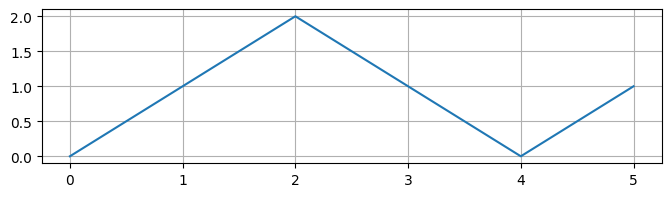

In [6]:
steps = [1, 1, -1, -1, 1]

walk = np.array([*accumulate(steps, initial=0)])
plt.figure(figsize=(8, 2))
plt.plot(walk, label="S")
plt.grid()

In [8]:
print(f"{steps=}, {T(steps)=}")

steps=[1, 1, -1, -1, 1], T(steps)=[1, -1, 1, 1, -1]


In [10]:
for n in range(1, 17):
    range_t = set()
    for num in range(1 << n):
        steps = [1 if num & (1 << i) else -1 for i in range(n)]
        range_t.add(tuple(T(steps)))
    assert len(range_t) == 1 << n
print("ok")

ok


In [11]:

def Tinv(x):
    s = sum(x)
    x = deque(x)
    result = []
    while x:
        step = x.popleft() if s > 0 else x.pop()
        s -= step
        result.append(step)
    result.reverse()
    return result


In [13]:
Tinv(T(steps)) == step

(True, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
for n in range(1, 17):
    for num in range(1<<n):
        steps = [2*((num >> i) & 1)-1 for i in range(n)]
        assert Tinv(T(steps)) == steps


In [15]:
def walk(steps):
    return np.array([*accumulate(steps, initial=0)])

def arg_max(steps):
    w = walk(steps)
    return (w==w.max()).nonzero()[0].min()

def pos_time(steps):
    w = walk(steps)
    return (w > 0).sum()



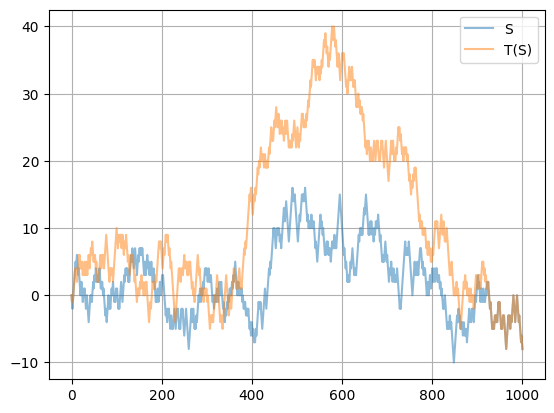

In [17]:
steps = np.where(np.random.binomial(1, 0.5, 1000), 1, -1)
plt.plot(walk(steps), label="S", alpha=0.5)
plt.plot(walk(T(steps)), label="T(S)", alpha=0.5)
plt.legend()
plt.grid()

arg_max(steps)=2, pos_time(steps)=4


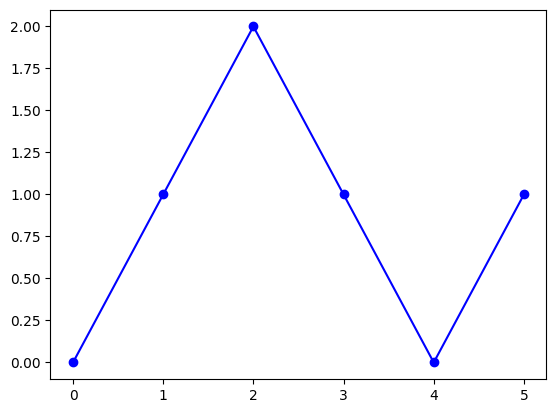

In [18]:
steps = [1, 1, -1, -1, 1]
plt.plot(walk(steps), "bo-")
print(f"{arg_max(steps)=}, {pos_time(steps)=}")

In [20]:
for n in range(1, 17):
    for num in range(1<<n):
        steps = [2*((num >> i) & 1)-1 for i in range(n)]
        assert arg_max(T(steps)) == pos_time(steps)
print("OK")

OK


**Bizonyítás.**

Ötlet: bolyongás (lépések) felbontása _kirándulásokra_.
$$
\sigma_0 = 0, \quad
\sigma_{2k+1} = \inf\{n\geq
\sigma_{2k}\colon S_n = 1\}, \quad
\sigma_{2k} = \inf\{n\geq
\sigma_{2k-1}\colon S_n = 0\}
$$

Egy kirándulás a pozitív oldalon a $\sigma_{2k+1}$. lépéssel kezdődik és a $\sigma_{2k+2}$. lépésig tart, az utolsó lépés már nem tartozik hozzá.

Egy kirándulás a negatív oldalon  a $\sigma_{2k}$. lépéssel kezdődik és a $\sigma_{2k+1}$. lépésig tart, az utolsó lépés már nem tartozik hozzá.

A pozitív oldalon töltött idő $n$ lépés alatt:
$$
    \sum_{k=1}^\infty (\sigma_{2k}\wedge n)-(\sigma_{2k-1}\wedge n)
$$

Ha az $(X_k)_{\sigma_{2k-1}\leq k < \sigma_{2k}}$ lépéseket fordítva soroljuk fel, akkor egy olyan lépéssorozatot **fordítunk meg**, ami a nulla szintről az egy szintre jut és közben végig az a nulla szint felett halad.

A lépések fordított felsorolása a középpontos tükrözésnek felel meg, ezért a mikor fordított sorrendben soroljuk fel az egy pozitív kiránduláshoz tartozó lépéseket, akkor olyan bolyngást kapunk, ami egységnyit emelkedik és végig az utolsó érték alatt marad. Ez mutatja, hogy a $T(X)$ sorozatból számolt bolyongás a $\text{pozitív idő}(S(X))$ időpontban nagyobb mint ezek előtt.

A negatív kirándulásokra hasonló érvelés mutatja, hogy ha egy negatív kirándulás egy pozitív kirándulás után jön akkor az első lépése lefelé visz, utána végig a nulla szint alatt marad. Ha pedig a nulla időpontban kezdődik, akkor nullából indul és esetleg többször is visszatérhet a 0-ba, de efelé már nem mehet, mert az a lépés már a következő pozitív kiránduláshoz van sorolva. Így, amikor $\text{pozitív idő}(S(X))$ időpont után a negatív kirándulásokat kezdjük el felhasználni, még néhányszor visszatérhet a bolyongás a $\text{pozitív idő}(S(X))$ időpontban felvett értékhez, de afölé már nem mehet.

In [ ]:
def excursions(steps):
    w = walk(steps)
    sigma = 0
    next_goal = 1 if steps[0] == -1 else 0
    pos_excursions = []
    neg_excursions = []
    excursion = []
    while sigma < len(steps):
        if w[sigma+1] == next_goal:
            if next_goal == 1:
                neg_excursions.append(excursion)
            else:
                pos_excursions.append(excursion)
            next_goal = 1-next_goal
            excursion = []
        excursion.append(steps[sigma])
        sigma += 1
    if next_goal == 1:
       neg_excursions.append(excursion)
    else:
        pos_excursions.append(excursion)
    return pos_excursions, neg_excursions

In [ ]:
steps = [1, 1, -1, -1, -1, 1, 1, 1]
print(f"{walk(steps)=}, {excursions(steps)=}")

In [ ]:
steps = np.where(np.random.binomial(1, 0.5, 1000), 1, -1)
pos_excursions, neg_excursions = excursions(steps)

In [ ]:
if len(pos_excursions) > 0:
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    ax0.plot(walk(pos_excursions[0]), "r-")
    ax1.plot(walk(reversed(pos_excursions[0])), "b-")
    ax0.grid(); ax1.grid()
    plt.show()
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    ax0.plot(walk(pos_excursions[-1]), "r-")
    ax1.plot(walk(reversed(pos_excursions[-1])), "b-")
    ax0.grid(); ax1.grid()
    plt.show()



In [ ]:
if len(neg_excursions) > 0:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    ax.plot(walk(neg_excursions[0]), "r-")
    ax.grid()
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    ax.plot(walk(neg_excursions[-1]), "r-")
    ax.grid()
    plt.show()


# Conway Game of Life

[Wikipédia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)

The Game of Life is a cellular automaton created by mathematician John Conway in 1970. The game consists of a board of cells that are either on or off. One creates an initial configuration of these on/off states and observes how it evolves. There are four simple rules to determine the next state of the game board, given the current state:

- **Overpopulation**: if a living cell is surrounded by more than three living cells, it dies.
- **Stasis**: if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation**: if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction**: if a dead cell is surrounded by exactly three cells, it becomes a live cell.

****

Írjunk egy osztályt a játékhoz, pl. az `__init__` metódus hozza létre a megadott konfigurációnak megfelelő objektumot. Legyen egy `step` metódus, ami a rendszert a következő állapotába viszi és az `__str__` metódus pedig
valahogy ábrázolja az aktuális állapotot.

Tegyük fel, hogy a rács amin a rendszer él, egy $m\times n$-es rács, ahol mindkét irányban ciklikusan körbemegyünk,
azaz a csúcsokat modulo $m$ ill. modulo $n$ tekintjük.


Alternatíva lehetne, hogy ha új elő sejt keletkezik az aktuális rács körül, akkor megnöveljük a rácsunkat az adott irányban.  

In [21]:
import numpy as np

class ConwayGoL:

    def __init__(self, state):
        self.state = np.asarray(state)

    def step(self):
        return self

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"

In [22]:


init_state = [] ## ???
conway = ConwayGoL(init_state)

conway.step()


ConwayGoL([])

A játék állapotának leírásához egy $m\times n$ rács minden pontjáról tudni kell, hogy foglalt-e vagy sem.

```python
m, n = 11, 11
state = np.zeros((11, 11), dtype=np.uint8)
```

Véletlenszerű kezdeti állapot:
```python
state = np.random.binomial(1, p, size=(m, n))
```

In [23]:
def random_state(n, m, p):
    return np.random.binomial(1, p, (n, m)).astype(np.uint8)

state = random_state(5, 6, 0.2)
print(state)

[[1 1 1 0 0 1]
 [1 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]


Szebb megjelenítés?

In [24]:
# def as_matrix(lst, n):
#     return [lst[i:i+n] for i in range(0, len(lst), n)]

print('\n'.join(''.join(map(str, line)) for line in state))


111001
110000
100010
000100
000000


In [25]:
for symbols in [
    "\u2b1c\u2b1b",
    "·♥",
    "🟡🟥"
    ]:
    print('\n'.join(''.join(symbols[x] for x in line) for line in state))


⬛⬛⬛⬜⬜⬛
⬛⬛⬜⬜⬜⬜
⬛⬜⬜⬜⬛⬜
⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜
♥♥♥··♥
♥♥····
♥···♥·
···♥··
······
🟥🟥🟥🟡🟡🟥
🟥🟥🟡🟡🟡🟡
🟥🟡🟡🟡🟥🟡
🟡🟡🟡🟥🟡🟡
🟡🟡🟡🟡🟡🟡


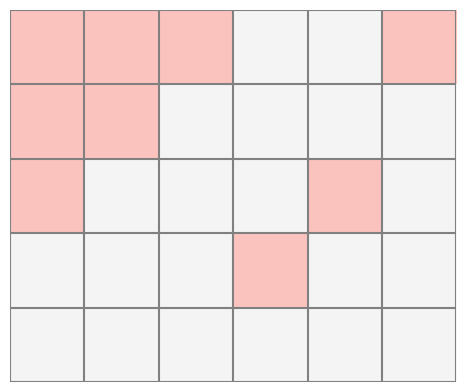

In [27]:
import matplotlib.pyplot as plt

img = plt.matshow(
    state,
    cmap="Pastel1_r",
    vmax=1, vmin=0, alpha=0.8)
img.axes.axis("off")
n, m = len(state), len(state[0])
for pos in range(0, n+1):
    img.axes.axhline(y=pos-0.5, color="gray")
for pos in range(0, m+1):
    img.axes.axvline(x=pos-0.5, color="gray")

plt.show()


In [28]:

def cgol_str(self):
    symbols = "\u2b1c\u2b1b" # ⬜⬛
    return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

ConwayGoL.__str__ = cgol_str



In [29]:
conway = ConwayGoL(state)
print(conway)

⬛⬛⬛⬜⬜⬛
⬛⬛⬜⬜⬜⬜
⬛⬜⬜⬜⬛⬜
⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜


A `step` metódushoz ki kellene számolni egy adott csúcs foglalt szomszédainak számát `cnt`. Ha ez kész,
akkor az $i$ csúcs új állapota:

$$
    \text{state}_{t+1}[i]=
    \begin{cases}
    1 &\text{Ha $\text{cnt}[i]\in\{2,3\}$ és $\text{state}_t[i]=1$}\\
    1 &\text{Ha $\text{cnt}[i]\in\{3\}$ és $\text{state}_t[i]=0$}\\
    0 &\text{különben}
    \end{cases}
$$

In [30]:
def newstate(state, count):
    return (count==3) | (state & (count==2))
    # return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

In [32]:
pip install ipytest -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [33]:
import ipytest
ipytest.autoconfig()

In [34]:
%%ipytest

def test_newstate():
    res = np.zeros(9, dtype=np.uint8)
    res[2] = 1
    res[3] = 1
    assert (
        (
            newstate(
                np.ones(9, dtype=np.uint8),
                np.arange(9, dtype=np.uint8))
            == res
        ).all()
    )
    res = np.zeros(9, dtype=np.uint8)
    res[3] = 1
    assert (newstate(np.zeros(9, dtype=np.uint8), np.arange(9,dtype=np.uint8)) == res).all()


.                                                                                            [100%]
1 passed in 0.02s


In [35]:
def count_neighbors(state):
    h, w = state.shape
    count = np.zeros((h+2, w+2), dtype=state.dtype)
    for dh, dw  in [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)]:
        count[1+dh:1+dh+h, 1+dw:1+dw+w] += state
    return count

def cgol_step(self):
    counts = count_neighbors(self.state)
    state = newstate(np.pad(self.state, 1), counts)
    if state[0].max() == 0:
        state = state[1:]
    if state[-1].max() == 0:
        state = state[:-1]
    if state[:,0].max() == 0:
        state = state[:,1:]
    if state[:,-1].max() == 0:
        state = state[:,:-1]
    self.state = state
    return self

ConwayGoL.step = cgol_step

In [36]:
@classmethod
def cgol_from_random_state(cls, n, m,  p):
    return cls(random_state(n, m, p))

ConwayGoL.from_random_state=cgol_from_random_state

In [37]:
conway = ConwayGoL.from_random_state(5, 10, 0.2)
print(conway)
print(*count_neighbors(conway.state), sep='\n')

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬛⬛⬜⬛⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬛⬜⬜⬜⬛⬛⬜⬛⬜
[0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 0 0 0 0]
[1 2 2 2 1 2 1 2 1 0 0 0]
[1 1 1 2 0 2 2 1 2 1 1 0]
[1 3 3 3 1 2 3 3 4 1 2 0]
[0 1 0 1 0 1 1 1 3 1 2 0]
[0 1 1 1 0 1 2 2 2 1 1 0]


In [46]:
conway = ConwayGoL.from_random_state(5, 5, 0.25)
print(conway)
print("-"*20)
print(conway.step())

⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬛
⬛⬜⬜⬜⬛
⬛⬜⬛⬜⬜
⬛⬛⬜⬜⬜
--------------------
⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜
⬜⬜⬛⬜⬛⬜
⬛⬛⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜


Tudunk-e valami animációszerűt készíteni? Jupyter notebook-ban pl. a következő képpen lehet:

In [47]:
from ipywidgets import Output
from time import sleep


In [49]:

out = Output()
display(out)
conway = ConwayGoL.from_random_state(n=21, m=51, p=0.2)

for i in range(50):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway}")
    sleep(0.15)
    conway.step()


Output()

## kis ellenőrzés

In [ ]:
state = random_state(11, 21, 0.2)
plt.matshow(np.pad(state, 1), cmap='Pastel1_r', vmax=1, vmin=0)
plt.xticks(np.arange(state.shape[1]+2)-.5, minor=True)
plt.xticks([])
plt.yticks(np.arange(state.shape[0]+2)-.5, minor=True)
plt.yticks([])
plt.grid(which="minor", color="gray", linestyle='-', linewidth=1)
plt.axis()

for (i, j), cnt in np.ndenumerate(count_neighbors(state)):
    plt.text(j, i, str(cnt), ha="center", va="center")


In [ ]:
plt.matshow(np.pad(state, 1), cmap='Pastel1_r', vmax=1, vmin=0)
plt.xticks(np.arange(state.shape[1]+2)-.5, minor=True)
plt.xticks([])
plt.yticks(np.arange(state.shape[0]+2)-.5, minor=True)
plt.yticks([])
plt.grid(which="minor", color="gray", linestyle='-', linewidth=1)
plt.axis()

for (i, j), cnt in np.ndenumerate(newstate(np.pad(state, 1), count_neighbors(state))):
    plt.text(j, i, str(cnt), ha="center", va="center")


In [ ]:
out = Output()
display(out)
state = random_state(n=51, m=21, p=0.2)

for i in range(50):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{str_state(state)}")
    sleep(0.15)
    state = new_state(state)


## Parancssoros script

Ha parancssorból dolgozunk, akkor valami ilyesmit lehetne tenni

In [50]:
%%writefile conway.py

import numpy as np

def random_state(n, m, p):
    return np.random.binomial(1, p, (n, m)).astype(np.uint8)


def count_neighbors(state):
    h, w = state.shape
    count = np.zeros((h+2, w+2), dtype=state.dtype)
    for dh, dw  in [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)]:
        count[1+dh:1+dh+h, 1+dw:1+dw+w] += state
    return count


def newstate(state, count):
    return ((count==3) | ((count==2) & (state==1))).astype(state.dtype)


class ConwayGoL:
    symbols = "\u2b1c\u2b1b"

    def __init__(self, state):
        self.state = np.asarray(state)

    def step(self):
        counts = count_neighbors(self.state)
        state = newstate(np.pad(self.state, 1), counts)
        if state[0].max() == 0:
            state = state[1:]
        if state[-1].max() == 0:
            state = state[:-1]
        if state[:,0].max() == 0:
            state = state[:,1:]
        if state[:,-1].max() == 0:
            state = state[:,:-1]
        self.state = state
        return self

    def __str__(self):
        symbols = self.symbols
        return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"

    @classmethod
    def from_random_state(cls, m, n, p):
        return cls(random_state(m, n, p))

    def is_empty(self):
        return self.state.max()==0


def clear_terminal(n):
    print(f"{chr(27)}[{n+1}A", end="")

def main(m=11, n=25, p=0.2, nsteps=10, clear_screen=clear_terminal):
    from time import sleep
    conway = ConwayGoL.from_random_state(m, n, p)
    for i in range(nsteps+1):
        if i>0:
            clear_screen(conway.state.shape[0])
        print(f"after {i} step:")
        print(conway)
        sleep(0.2)
        conway.step()
        if conway.is_empty():
            break

if __name__ == "__main__":
    main()


Writing conway.py


Ha valamit már megírtunk és szeretnénk használni, `import`-tal elérhető. Pl.

### Tudunk-e paramétereket adni a python scriptnek?

Amikor egy python scriptet futtatunk, a parancssor (amivel a futást indítottuk) a `sys` modul `argv` változójában érhető el.

In [51]:
import sys
sys.argv

['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py',
 '-f',
 '/root/.local/share/jupyter/runtime/kernel-58edb0cb-c044-43ab-b801-d8e7d3bd1b81.json']

In [52]:
! python -c 'import sys; print(sys.argv)' -alma


['-c', '-alma']


Egy nagyon egyszerű megoldás, ha minden opciónak a neve a paraméter amit beállít és egyenlőségjel után az értéke:
pl. n=11 m=25 nstep=10 p=0.2

In [53]:
cmdline = "conway.py -n=11 -m=25 -nstep=10 -p=0.2"
argv = cmdline.split()
params =[param.split("=") for param in argv[1:]]
params

[['-n', '11'], ['-m', '25'], ['-nstep', '10'], ['-p', '0.2']]

Minden paraméterről tudni kellene, hogy milyen típusú!

In [54]:
param_types={'-n': int, '-m': int, '-nstep': int, '-p': float}
params = {k.replace("-",""): param_types[k](v)  for k, v in (param.split("=") for param in argv[1:])}
params

{'n': 11, 'm': 25, 'nstep': 10, 'p': 0.2}

Ezek után a `main` függvényt a megadott paraméterekkel meg tudjuk hívni:

```
    main(**params)
```
Mi van a `default` értékekkel, `help`-pel stb.

Ezeket mind meg tudnánk írni, de nem kell. Van kész megoldás `python`-ban.

Az `argparse` könvytár mindent megcsinál, ami nekünk kell.

In [55]:
import argparse

help(argparse)

Help on module argparse:

NAME
    argparse - Command-line parsing library

MODULE REFERENCE
    https://docs.python.org/3.10/library/argparse.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module is an optparse-inspired command-line parsing library that:
    
        - handles both optional and positional arguments
        - produces highly informative usage messages
        - supports parsers that dispatch to sub-parsers
    
    The following is a simple usage example that sums integers from the
    command-line and writes the result to a file::
    
        parser = argparse.ArgumentParser(
            description='sum the integers at the command line')
        parser.add_argument(


A `conway.py` file végét cseréljük le erre.

In [56]:
%%writefile conway_cli.py

import conway

if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser(description='Conways Game of Life')

    parser.add_argument(
        '-n', '--nrows',
        type=int,
        default=11,
        help='number of rows'
        )

    parser.add_argument(
        '-m', '--ncols',
        type=int,
        default=25,
        help='number of columns'
        )

    parser.add_argument(
        '-p', '--density',
        type=float,
        default=0.2,
        help='initial density')

    parser.add_argument(
        '--nsteps',
        type=int,
        default=10,
        help='steps to display'
        )

    args = parser.parse_args()
    print(args)

    conway.main(n=args.ncols, m=args.nrows, p=args.density, nsteps=args.nsteps)


Writing conway_cli.py


In [57]:
! python conway_cli.py

Namespace(nrows=11, ncols=25, density=0.2, nsteps=10)
after 0 step:
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬛⬛⬜⬜⬜⬜⬛⬜⬛⬜⬜
⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬛⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬛⬜
⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬛⬜⬛
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬛⬛⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬛
⬜⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜
after 1 step:
⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬛⬛⬜⬛⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜
⬛⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬛⬜⬛⬛⬛⬛
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬛
⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛
⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬛⬛⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬛⬛⬜⬜⬛⬜⬜⬛
⬜⬜⬛⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
after 2 step:
⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬛⬜⬜⬛⬛⬛⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬛⬜⬛⬜⬜
⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬛
⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬛⬜⬛⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
after 3 

In [ ]:
# import importlib
# importlib.reload(conway)

In [ ]:
import conway

out1 = Output()
display(out1)

with out1:
    conway.main(clear_screen=lambda n: out1.clear_output(True))

Az `argparse` könyvtár nem a legkényelmesebb. Alternatívák:

- [Docopt](http://docopt.org/)
- [Click](https://pypi.org/project/click/)
- [clize](https://github.com/epsy/clize)

és még sok másik is!

## Itt is használhattunk volna dekorátort


A `ConwayGoL` példában utólag adtunk metódusokat az osztályunkhoz. Ezt is megtehettük volna dekorátorral.  

In [ ]:
def conway_method(f):
    setattr(ConwayGoL, f.__name__, f)
    return f


@conway_method
def dummy_method(self):
    print("this is a message from the new method!")

c = ConwayGoL([])
c.dummy_method()

Azt is megtehettük volna, hogy a osztály nincs beleégetve a kódba.

In [ ]:
def new_method(cls):
    def decorator(f):
        setattr(cls, f.__name__, f)
        return f
    return decorator

@new_method(ConwayGoL)
def dummy_method(self):
    print("Note that the old value of dummy_method is overwritten!")

In [ ]:
c.dummy_method()

## Néhány minta

In [60]:
import urllib.request as request


In [58]:

urls = [
    "https://conwaylife.com/patterns/83p7h1v1.cells",
    "https://conwaylife.com/patterns/rotatedhouse.cells",
]



In [61]:
with request.urlopen(urls[0]) as file:
    btext = file.read()
text = btext.decode("utf-8")
print(text)
data = [[0 if c == "." else 1 for c in line] for line in text.splitlines() if not line.startswith("!")]


! Lobster (spaceship)
! Matthias Merzenich
! https://conwaylife.com/wiki/Lobster_(spaceship)
! https://conwaylife.com/patterns/83p7h1v1.cells
...........OOO............
.............O............
........OO..O.............
........OO................
............OO............
...........OO.............
..........O..O............
..........................
........O..O..............
.......O...O..............
......O.OOO...............
.....O....................
.....O.............O.O..OO
......O.............OO.O.O
.OO.............OO..O....O
O..OO..OO......O...O......
.....O..O......O......OO..
.........OO....O.O....OO..
..O...O...O.....O.........
......OO....O..O..........
.O.O.....O...OO...........
OO........O...............
.....O....O...............
.......O...O..............
....OO.....O..............
....O.....O...............


In [62]:
from ipywidgets import Output
from time import sleep
import numpy as np


In [64]:
import conway
out = Output()
display(out)


conway_gol = conway.ConwayGoL(data)

for i in range(100):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway_gol}")
    sleep(0.15)
    conway_gol.step()
    if conway_gol.is_empty():
        break


Output()

In [ ]:
with request.urlopen(urls[1]) as file:
    btext = file.read()
text = btext.decode("utf-8")
print(text)
data = [[0 if c == "." else 1 for c in line] for line in text.splitlines() if not line.startswith("!")]


! rotatedhouse.cells
! https://conwaylife.com/wiki/Rotated_house
! https://www.conwaylife.com/patterns/rotatedhouse.cells
OO.....
O.O....
..O..OO
O.O.O.O
OO..O..
....O.O
.....OO



In [ ]:

out = Output()
display(out)


conway_gol = conway.ConwayGoL(data)

for i in range(10):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway_gol}")
    sleep(0.15)
    conway_gol.step()
    if conway_gol.is_empty():
        break


Output()